<a href="https://www.kaggle.com/code/pavankumar20/temperature-forecasting-analysis?scriptVersionId=97789031" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smart-homes-temperature-time-series-forecasting/sample_submission.csv
/kaggle/input/smart-homes-temperature-time-series-forecasting/Solar house sensors and actuators map.png
/kaggle/input/smart-homes-temperature-time-series-forecasting/train.csv
/kaggle/input/smart-homes-temperature-time-series-forecasting/test.csv


In [2]:
train=pd.read_csv('/kaggle/input/smart-homes-temperature-time-series-forecasting/train.csv')
test=pd.read_csv('/kaggle/input/smart-homes-temperature-time-series-forecasting/test.csv')

In [3]:
total_data=pd.concat([train.drop(['Indoor_temperature_room'],axis=1),test],ignore_index=True)

# Importing the Libraries

In [4]:
import pandas as pd
import numpy as np

In [5]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Data Analysis

In [6]:
total_data.head()

,Id,Date,Time,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,Meteo_Sun_light_in_east_facade,Meteo_Sun_light_in_south_facade,Meteo_Sun_irradiance,Outdoor_relative_humidity_Sensor,Day_of_the_week
0,0,13/03/2012,11:45,216.560,221.920,39.9125,42.4150,81.6650,113.520,0.0,623.360,1.42625,9690.24,12604.20,95436.8,758.880,48.3750,2.0
1,1,13/03/2012,12:00,219.947,220.363,39.9267,42.2453,81.7413,113.605,0.0,623.211,1.59200,11022.00,10787.20,95436.8,762.069,47.8080,2.0
2,2,13/03/2012,12:15,219.403,218.933,39.7720,42.2267,81.4240,113.600,0.0,622.656,1.89133,13960.50,9669.63,95398.6,766.251,47.4320,2.0
3,3,13/03/2012,12:30,218.613,217.045,39.7760,42.0987,81.5013,113.344,0.0,622.571,1.82800,18511.20,9648.13,95360.3,766.037,47.0240,2.0
4,4,13/03/2012,12:45,217.714,216.080,39.7757,42.0686,81.4657,113.034,0.0,622.400,2.36071,26349.00,9208.32,95354.9,762.743,45.4743,2.0


Observations:

> Time variable- values are noted for every 15minutes(can be changed into range of values).

> From observed 5 values, the Indoor_temperature_room increases with time(without zig-zag pattern).

> Time components are Date, Time, Day_of_the_week.

In [7]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4137 entries, 0 to 4136
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id                                4137 non-null   int64  
 1   Date                              4137 non-null   object 
 2   Time                              4137 non-null   object 
 3   CO2_(dinning-room)                4137 non-null   float64
 4   CO2_room                          4137 non-null   float64
 5   Relative_humidity_(dinning-room)  4137 non-null   float64
 6   Relative_humidity_room            4137 non-null   float64
 7   Lighting_(dinning-room)           4137 non-null   float64
 8   Lighting_room                     4137 non-null   float64
 9   Meteo_Rain                        4137 non-null   float64
 10  Meteo_Sun_dusk                    4137 non-null   float64
 11  Meteo_Wind                        4137 non-null   float64
 12  Meteo_

In [8]:
total_data.describe()

,Id,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,Meteo_Sun_light_in_east_facade,Meteo_Sun_light_in_south_facade,Meteo_Sun_irradiance,Outdoor_relative_humidity_Sensor,Day_of_the_week
count,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000
mean,2068.000000,206.599835,209.611623,42.389879,44.546069,28.970248,42.335496,0.038756,335.094312,1.304623,14749.149509,13566.284958,19857.184071,232.203649,53.251632,3.962549
std,1194.393361,22.763114,24.183477,7.215405,8.297436,25.684356,42.602571,0.187128,304.513038,1.223829,25306.450482,23311.852941,29494.598354,312.460713,13.511063,1.988923
min,0.000000,187.339000,188.907000,26.173300,27.256000,10.740000,11.328000,0.000000,0.606667,0.000000,0.000000,0.000000,0.000000,-4.164670,22.246700,1.000000
25%,1034.000000,200.228000,201.707000,36.088000,38.446700,11.540700,13.509300,0.000000,0.650000,0.168667,0.000000,0.000000,0.000000,-3.250670,42.650700,2.000000
50%,2068.000000,205.131000,208.907000,42.776000,44.802700,14.126700,22.085300,0.000000,612.821000,0.962667,752.640000,1025.020000,645.120000,11.246000,54.717300,4.000000
75%,3102.000000,210.016000,212.331000,47.584000,50.301300,40.034700,55.064000,0.000000,619.712000,2.225330,14627.500000,12907.200000,33263.600000,479.552000,63.128000,6.000000
max,4136.000000,594.389000,609.237000,60.957300,62.594700,111.797000,162.965000,1.000000,625.003000,6.321330,95278.400000,92367.500000,95704.400000,1094.660000,83.805300,7.000000


In [9]:
#No nan values in the dataset.
total_data.isnull().sum()

Id                                  0
Date                                0
Time                                0
CO2_(dinning-room)                  0
CO2_room                            0
Relative_humidity_(dinning-room)    0
Relative_humidity_room              0
Lighting_(dinning-room)             0
Lighting_room                       0
Meteo_Rain                          0
Meteo_Sun_dusk                      0
Meteo_Wind                          0
Meteo_Sun_light_in_west_facade      0
Meteo_Sun_light_in_east_facade      0
Meteo_Sun_light_in_south_facade     0
Meteo_Sun_irradiance                0
Outdoor_relative_humidity_Sensor    0
Day_of_the_week                     0
dtype: int64

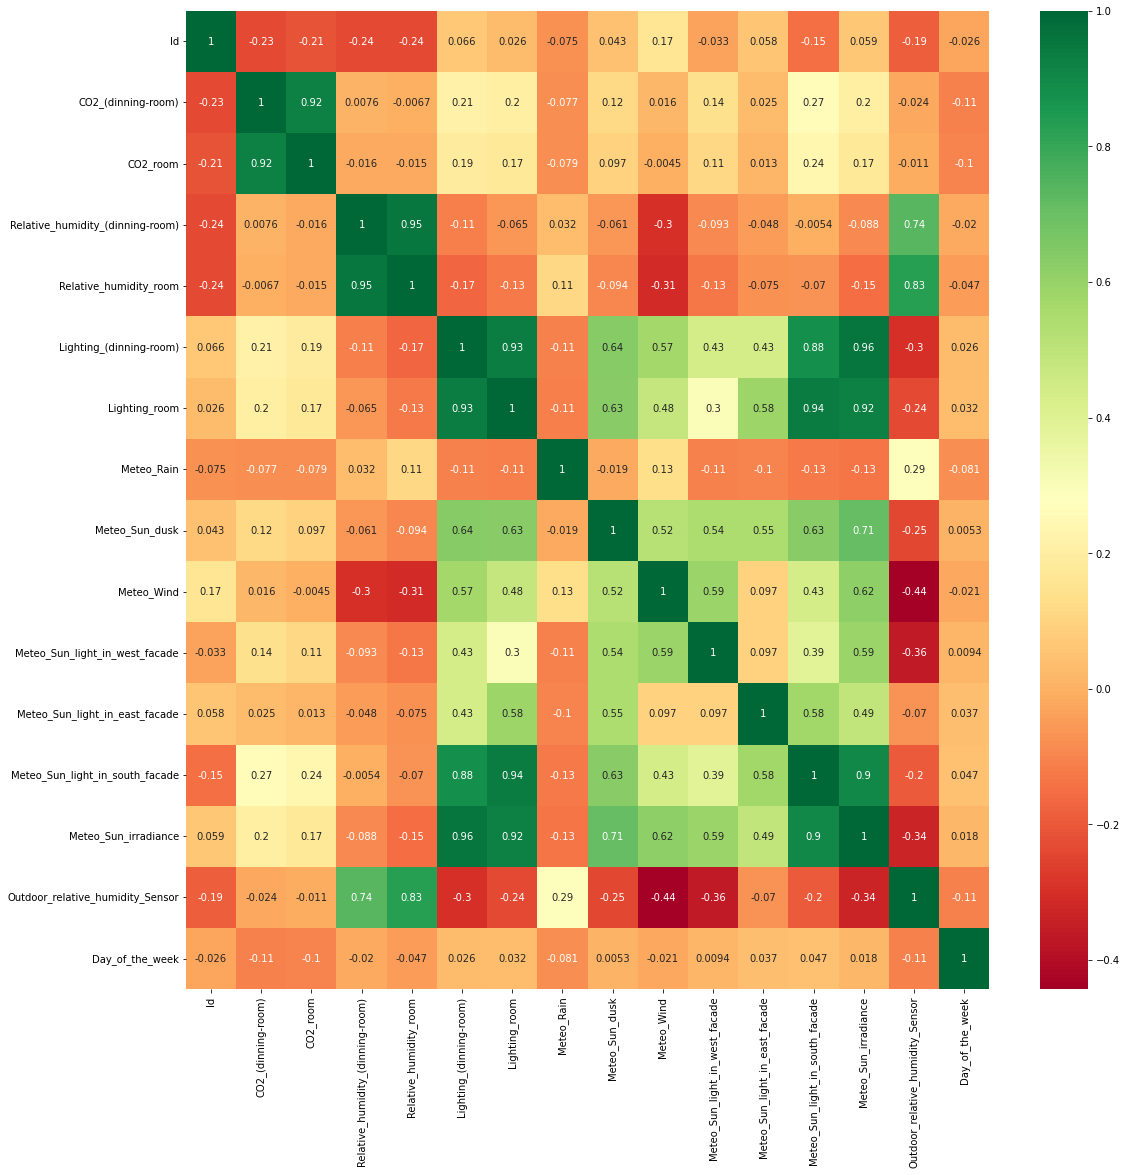

In [10]:
plt.figure(figsize = (18,18))
sns.heatmap(total_data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

> Some of the variables are highly correlated with each other(Ex:-CO2_(dinning-room),CO2_room), which leads to multicollinearity.

1. Remove some of the highly correlated independent variables.
2. Linearly combine the independent variables, such as adding them together.
3. Perform an analysis designed for highly correlated variables, such as principal components analysis or partial least squares regression.
4. LASSO and Ridge regression are advanced forms of regression analysis that can handle multicollinearity. If you know how to perform linear least squares regression, you’ll be able to handle these analyses with just a little additional study.

https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

In [11]:
train.columns

Index(['Id', 'Date', 'Time', 'CO2_(dinning-room)', 'CO2_room',
       'Relative_humidity_(dinning-room)', 'Relative_humidity_room',
       'Lighting_(dinning-room)', 'Lighting_room', 'Meteo_Rain',
       'Meteo_Sun_dusk', 'Meteo_Wind', 'Meteo_Sun_light_in_west_facade',
       'Meteo_Sun_light_in_east_facade', 'Meteo_Sun_light_in_south_facade',
       'Meteo_Sun_irradiance', 'Outdoor_relative_humidity_Sensor',
       'Day_of_the_week', 'Indoor_temperature_room'],
      dtype='object')

From the Graph

> Output has high correlation between variables Relavtive_humidity_room,Meteo_Sun_light_in_west_facade, Outdoor_relative_humidity_Sensor.

> Least correlation with Lighting_room,Meteo_Sun_light_in_south_facade

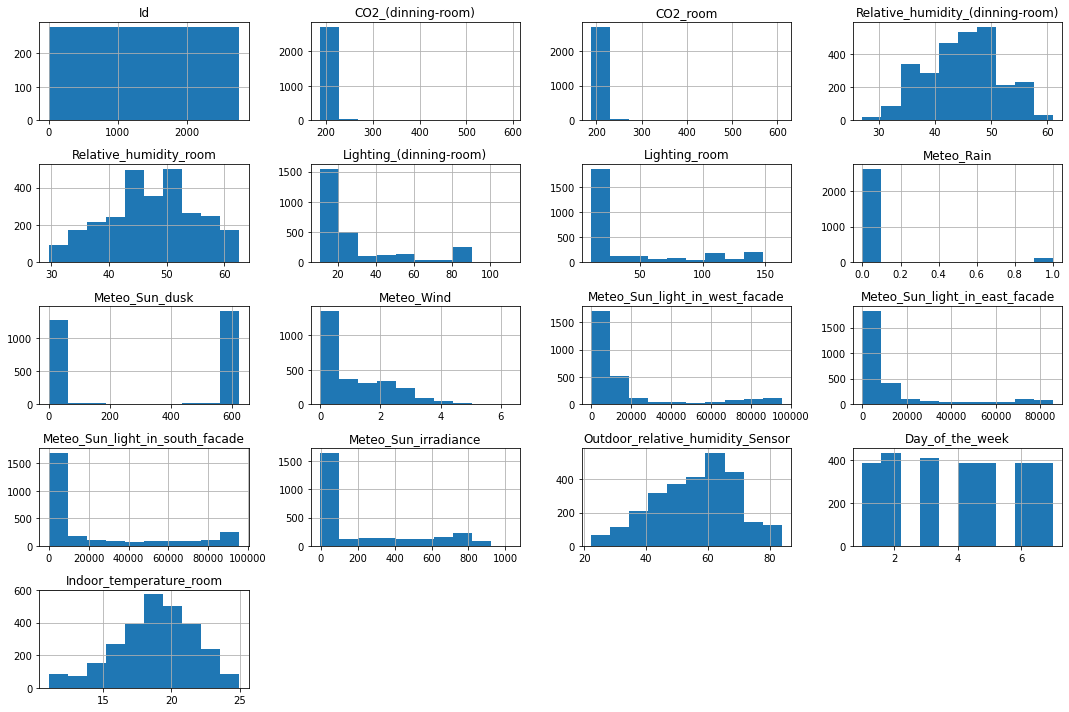

In [12]:
train.hist(bins=10, figsize=(15, 10))
plt.tight_layout()

>  Relative_humidity_(dinning room) and Outdoor_relative_humidity_Sensor are left skewed(so can apply log function)

# Image

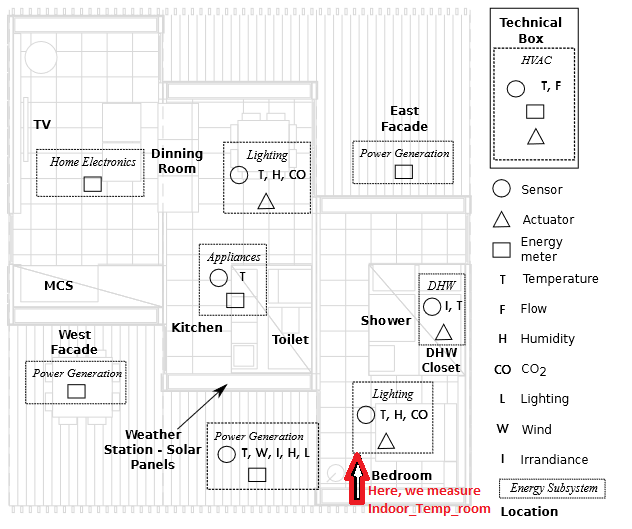

# Basic Prediction- before feature Engineering

In [13]:
X=train.drop(['Indoor_temperature_room','Id','Date','Time'],axis=1)
Y=train['Indoor_temperature_room']
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=40)

In [14]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression(normalize=True,)
lnr.fit(x_train,y_train)
y_pred=lnr.predict(x_train)
print("Basic model prediction accuracy=",mean_squared_error(y_pred,y_train))

Basic model prediction accuracy= 3.5880482144018337


In [15]:
y_pred=lnr.predict(x_val)
print("Basic model prediction accuracy=",mean_squared_error(y_pred,y_val))

Basic model prediction accuracy= 3.6408148676784324


# Feature Eng and analysis

In [16]:
total_data['Date']=pd.to_datetime(total_data['Date'],format="%d/%m/%Y")
total_data['Day']=total_data['Date'].dt.dayofyear.astype(float)
total_data['Time']=pd.DatetimeIndex(total_data['Time'])
total_data['Minutes']=total_data['Time'].apply(lambda x: x.hour *60 + x.minute).astype(float)
total_data['Day_of_the_week']=total_data['Day_of_the_week'].astype(int)

In [17]:
X_1=pd.merge(total_data,train[['Id','Indoor_temperature_room']],on='Id')

<AxesSubplot:title={'center':'Seasonal Plot (Day/Minutes)'}, xlabel='Minutes', ylabel='Indoor_temperature_room'>

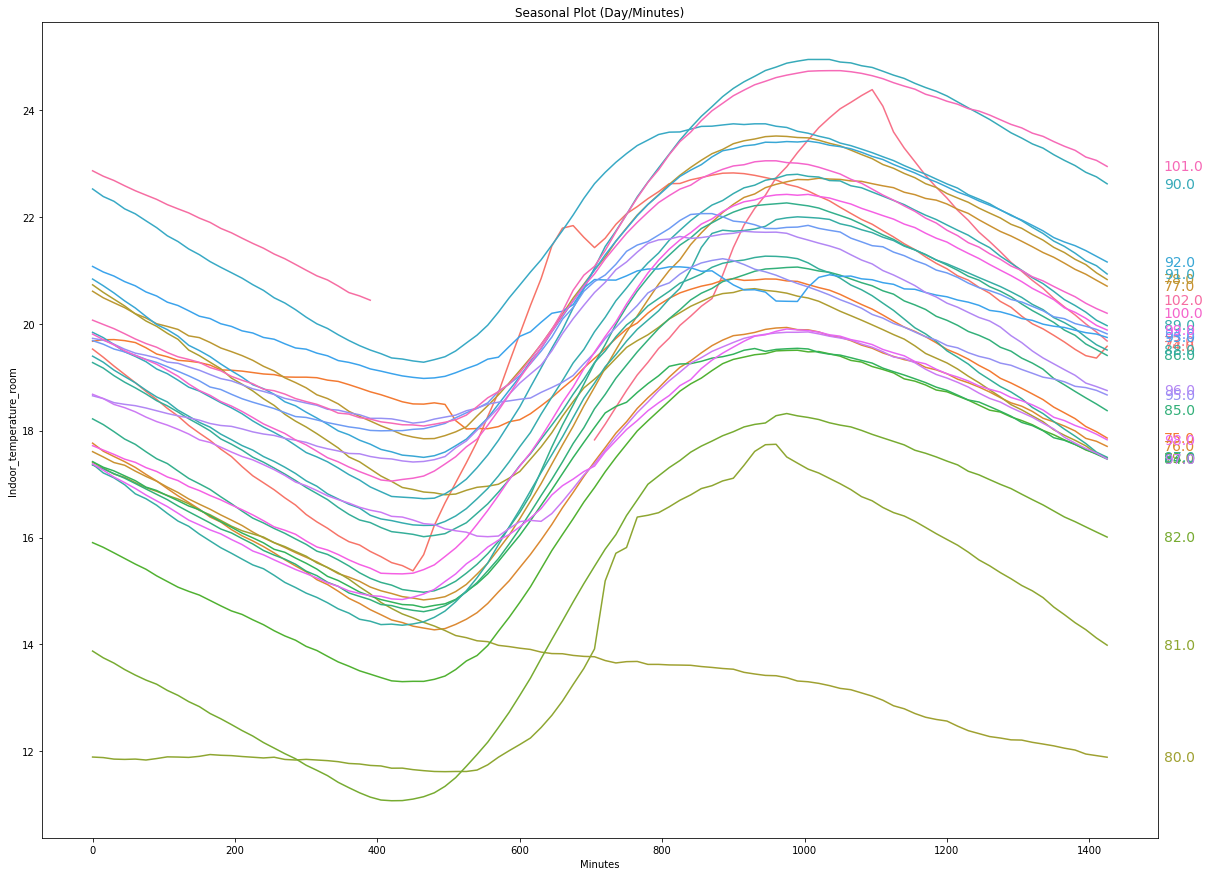

In [18]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax
fig,ax0=plt.subplots(figsize=(20,15))
seasonal_plot(X_1, y="Indoor_temperature_room", period="Day", freq="Minutes", ax=ax0)

> Clearly a seasonality curve with respect to hour each day

>Day 80 seems like an Outlier

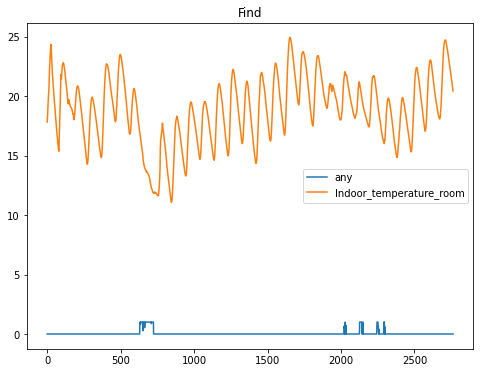

In [19]:
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(X_1['Id'],(X_1['Meteo_Rain']),label='any')
ax.plot(X_1['Id'],X_1['Indoor_temperature_room'],label='Indoor_temperature_room')
ax.set_title('Find')
plt.legend()
plt.show()

> Comparing with all other variables

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'CO2_(dinning-room)'),
  Text(1, 0, 'CO2_room'),
  Text(2, 0, 'Relative_humidity_(dinning-room)'),
  Text(3, 0, 'Relative_humidity_room'),
  Text(4, 0, 'Lighting_(dinning-room)'),
  Text(5, 0, 'Lighting_room'),
  Text(6, 0, 'Meteo_Rain'),
  Text(7, 0, 'Meteo_Sun_dusk'),
  Text(8, 0, 'Meteo_Wind'),
  Text(9, 0, 'Meteo_Sun_light_in_west_facade'),
  Text(10, 0, 'Meteo_Sun_light_in_east_facade'),
  Text(11, 0, 'Meteo_Sun_light_in_south_facade'),
  Text(12, 0, 'Meteo_Sun_irradiance'),
  Text(13, 0, 'Outdoor_relative_humidity_Sensor'),
  Text(14, 0, 'Indoor_temperature_room')])

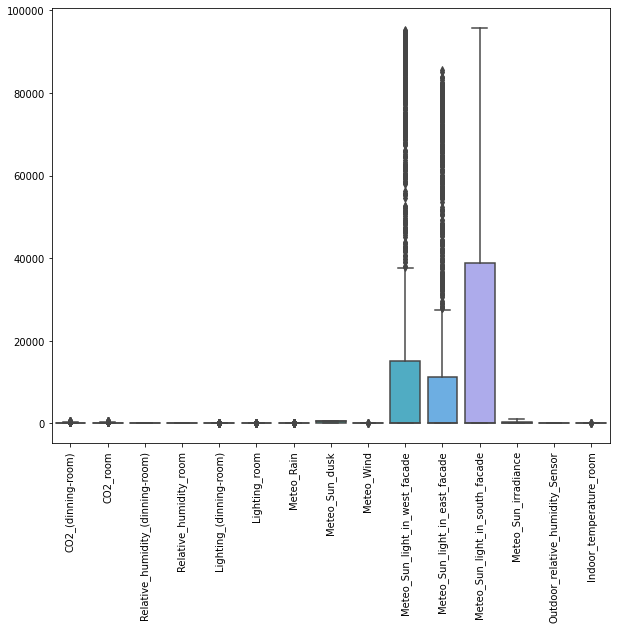

In [20]:
fig,ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=X_1.drop(['Time','Id','Date','Minutes','Day','Day_of_the_week'],axis=1))
plt.xticks(rotation=90)

> lot of values seems like not important(values nearly equall to zero, might be noise)

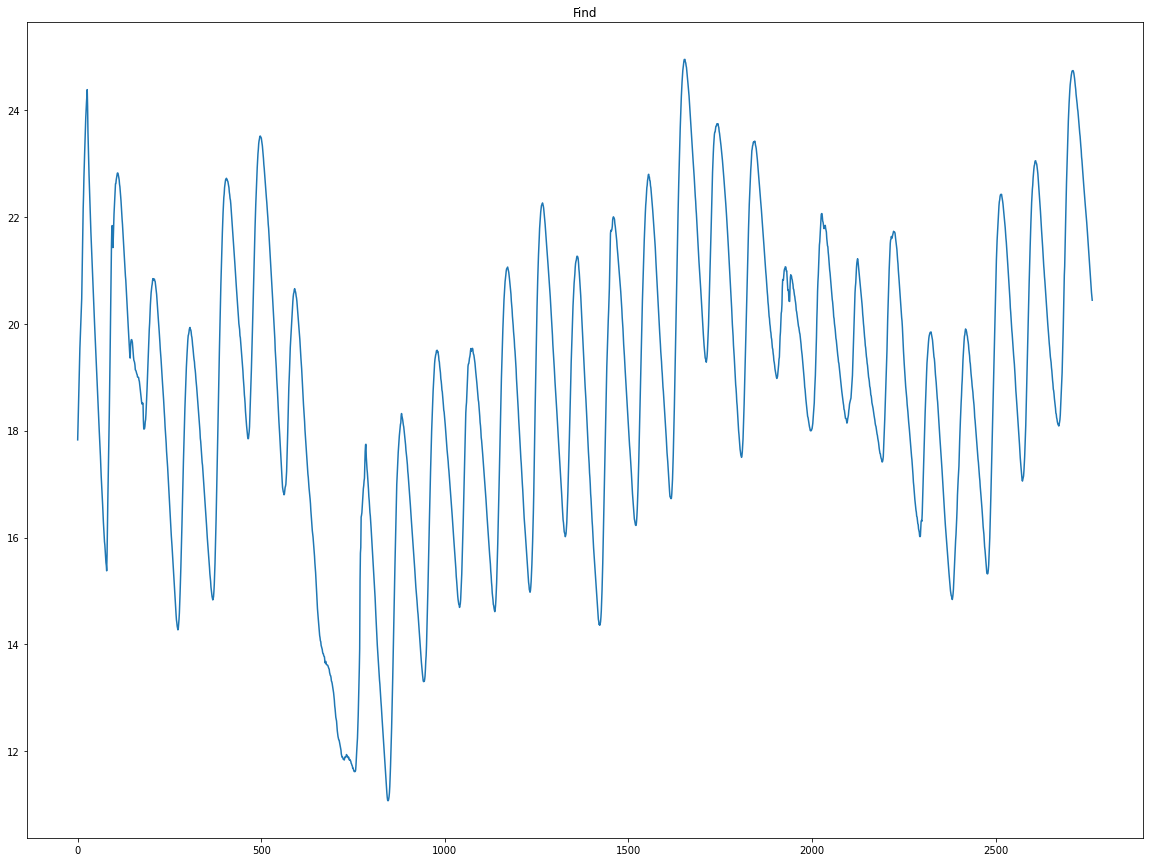

In [21]:
fig,ax=plt.subplots(figsize=(20,15))
ax.plot(X_1['Id'],X_1['Indoor_temperature_room'])
ax.set_title('Find')
plt.show()

> No long term trend(bcz Date is only from 13 to 11, nearly a month), but seasonality exist within a Day

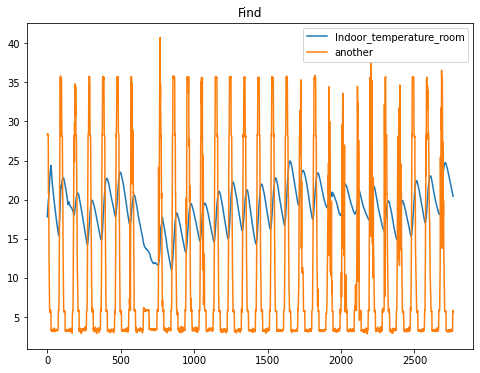

In [22]:
Q1=X_1['Indoor_temperature_room']
Q3=X_1['Lighting_room']
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(X_1['Id'],Q1,label='Indoor_temperature_room')
ax.plot(X_1['Id'],Q3/4,label='another')
ax.set_title('Find')
plt.legend()
plt.show()

# Removing some Rows

> Day 73 and 102 does not have all values(24hrs) in training dataset

In [23]:
total_data=total_data[(total_data['Day']!=73) & (total_data['Day']!=102)&(total_data['Day']!=80)]
X_1=pd.merge(total_data,train[['Id','Indoor_temperature_room']],on='Id')

In [24]:
Q2=X_1[['Indoor_temperature_room','Minutes']].groupby(['Minutes']).mean().reset_index()

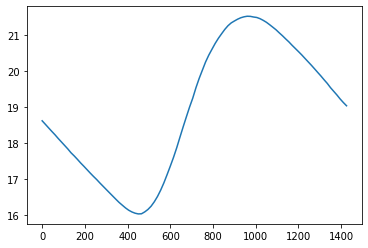

In [25]:
fig,ax=plt.subplots()
ax.plot(Q2['Minutes'],Q2['Indoor_temperature_room'])
plt.show()

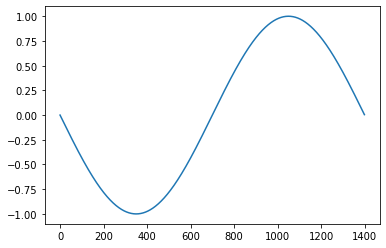

In [26]:
a1=np.arange(0,1400)
a2=-np.sin(2*np.pi*a1/1400)
fig,ax=plt.subplots()
ax.plot(a1,a2)
plt.show()

* Clearly a sinosoidal wave with respect to each day
* 18.5 at 0:00am and slowly decreasing to 16 at 7am, and started increasing to 21 approx at around 3pm and finally reached 19 by the end of the day.

> Here, I have decided to subtract the average values(00:00 to 24:00) of all days from Output variable and predict for remaining part 

In [27]:
Q2.rename(columns={'Indoor_temperature_room':'Out_avg'},inplace=True)

In [28]:
total_data=pd.merge(total_data,Q2, on='Minutes').sort_values(['Id']).reset_index()
total_data=total_data.iloc[:,1:]

> Algorithms that do not require normalization/scaling are the ones that rely on rules. They would not be affected by any monotonic transformations of the variables. Scaling is a monotonic transformation. Examples of algorithms in this category are all the tree-based algorithms — CART, Random Forests, Gradient Boosted Decision Trees. These algorithms utilize rules (series of inequalities) and do not require normalization.

https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

> By using Fourier Series we can create new variables to predict the seasonality within a interval

In [29]:
#from statsmodels.tsa.deterministic import CalendarFourier
#cal_fourier_gen = CalendarFourier("D", 2)
#P=cal_fourier_gen.in_sample(total_data['Time'])

In [30]:
#total_data=pd.concat([total_data.reset_index(),P.reset_index().drop(['Time'],axis=1)],axis=1)

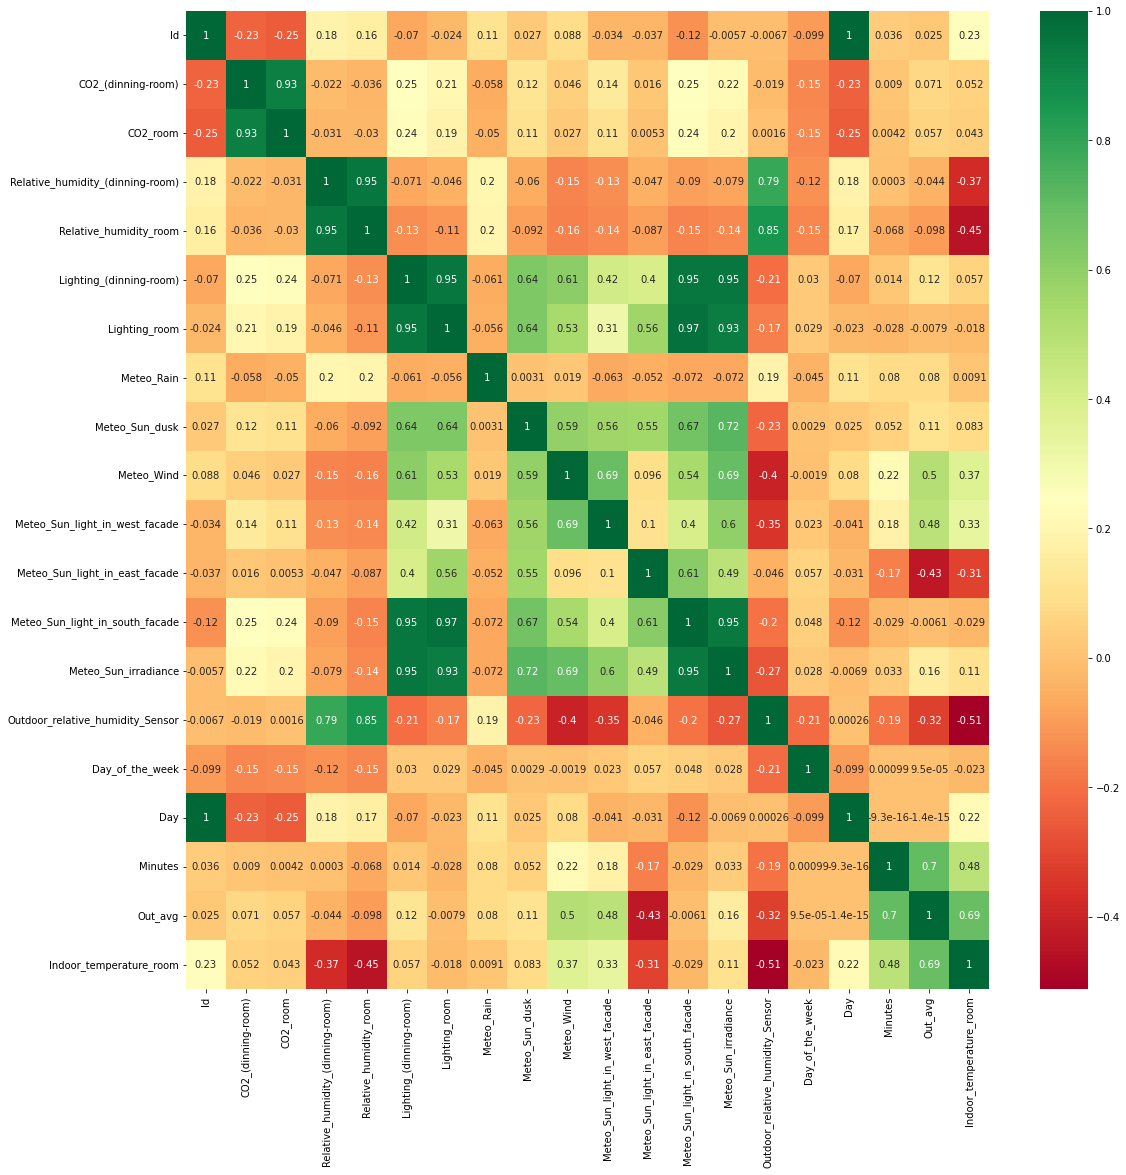

In [31]:
X_1=pd.merge(total_data,train[['Id','Indoor_temperature_room']],on='Id')
plt.figure(figsize = (18,18))
sns.heatmap(X_1.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [32]:
total_data.columns

Index(['Id', 'Date', 'Time', 'CO2_(dinning-room)', 'CO2_room',
       'Relative_humidity_(dinning-room)', 'Relative_humidity_room',
       'Lighting_(dinning-room)', 'Lighting_room', 'Meteo_Rain',
       'Meteo_Sun_dusk', 'Meteo_Wind', 'Meteo_Sun_light_in_west_facade',
       'Meteo_Sun_light_in_east_facade', 'Meteo_Sun_light_in_south_facade',
       'Meteo_Sun_irradiance', 'Outdoor_relative_humidity_Sensor',
       'Day_of_the_week', 'Day', 'Minutes', 'Out_avg'],
      dtype='object')

In [33]:
#total_data['Relative_humidity_avg']=(total_data['Relative_humidity_(dinning-room)']).shift(1).bfill()
#total_data['CO2_avg']=(total_data['CO2_(dinning-room)']).shift(1).bfill()
#total_data['light_total']=(total_data['Lighting_(dinning-room)']).shift(1).bfill()
#total_data['Meteo_Rain_lg']=total_data['Meteo_Rain'].shift(1).bfill()
#total_data['Outdoor_relative_humidity_Sensor_lg']=total_data['Outdoor_relative_humidity_Sensor'].shift(1).bfill()
#total_data['Outdoor_relative_humidity_Sensor-lag']=total_data['Outdoor_relative_humidity_Sensor'].shift(1).bfill()
#required_features=['Id','Relative_humidity_avg','Meteo_Rain','Meteo_Wind','Meteo_Sun_light_in_west_facade','Meteo_Sun_light_in_east_facade','Outdoor_relative_humidity_Sensor','Out_avg']
ad=total_data[['Id','Out_avg']]
final_data=total_data.drop(['Minutes','Out_avg','Date','Time','Day_of_the_week'],axis=1)
final_data['Meteo_Rain']=final_data['Meteo_Rain']*10

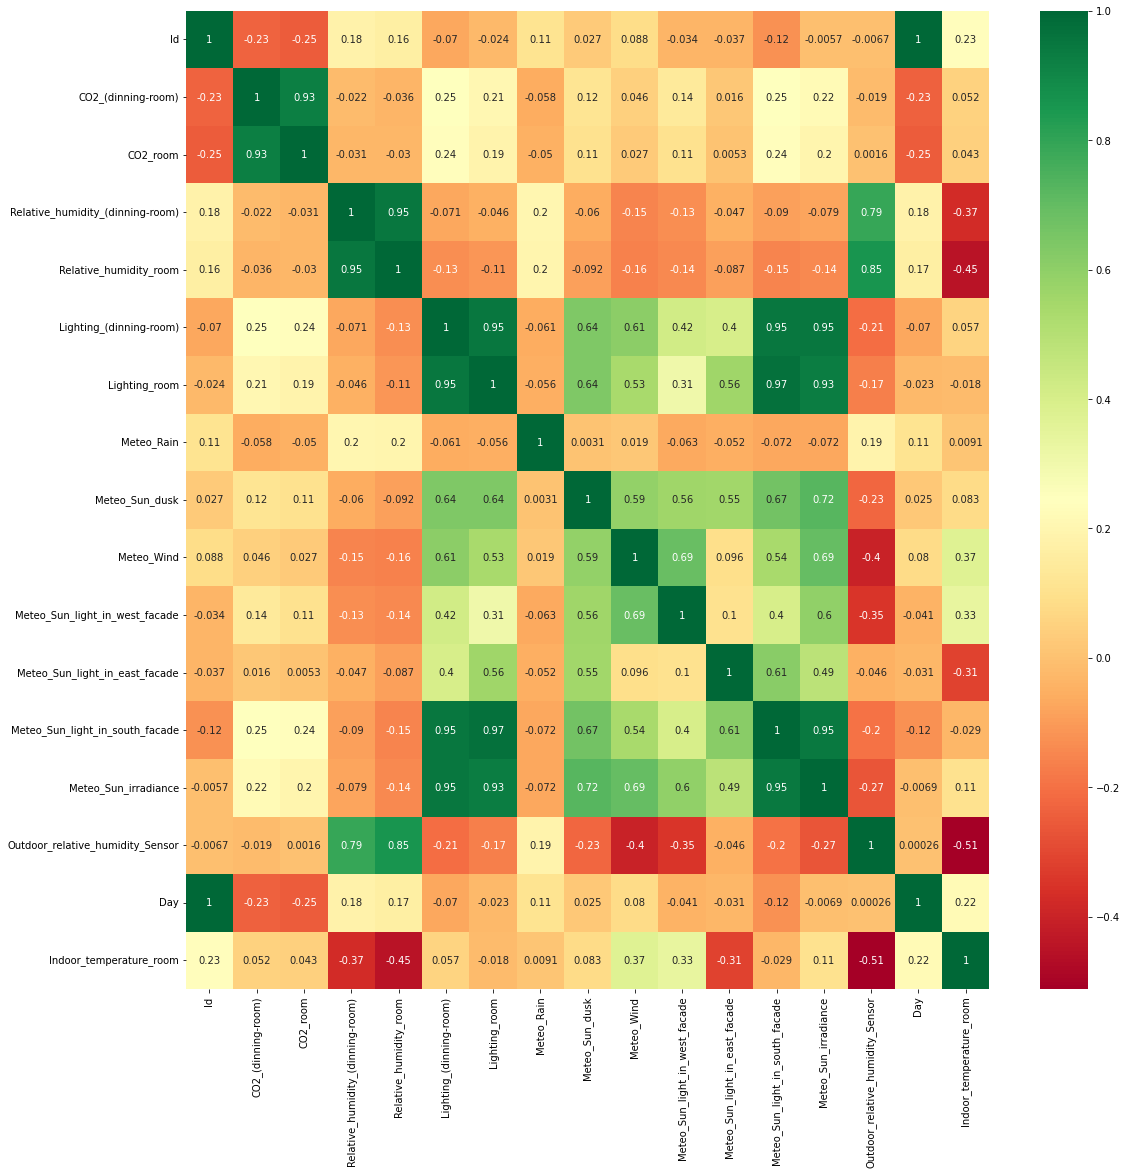

In [34]:
X_1=pd.merge(final_data,train[['Id','Indoor_temperature_room']],on='Id')
plt.figure(figsize = (18,18))
sns.heatmap(X_1.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [35]:
X_1=pd.merge(final_data,train[['Id','Indoor_temperature_room']],on='Id')

In [36]:
#from sklearn.preprocessing import StandardScaler,MinMaxScaler
#ss=StandardScaler()
#ss.fit(X_1.drop(['Id','Indoor_temperature_room'],axis=1))
#df=ss.transform(final_data.drop(['Id'],axis=1))
#final_data2=pd.DataFrame(df,index=final_data.index,columns=final_data.columns[1:])
#final_data2=pd.concat([final_data2,final_data['Id']],axis=1)
final_data2=final_data

# Linear Regression

In [37]:
X_1=pd.merge(final_data2,train[['Id','Indoor_temperature_room']],on='Id')
ad1=pd.merge(train['Id'],ad,on='Id')

In [38]:
X_1['Indoor_temperature_room']=X_1['Indoor_temperature_room']-ad1['Out_avg']

In [39]:
X=X_1.drop(['Indoor_temperature_room','Id'],axis=1)
y=X_1['Indoor_temperature_room']
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2,shuffle=False)

In [40]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression(normalize=True,)
lnr.fit(x_train,y_train)
y_pred=lnr.predict(x_train)
print("Basic model prediction accuracy=",mean_squared_error(y_pred,y_train))

Basic model prediction accuracy= 1.6844553032661185


In [41]:
y_pred2=lnr.predict(x_val)
print("Basic model prediction accuracy=",mean_squared_error(y_pred2,y_val))

Basic model prediction accuracy= 3.5003771046373013


In [42]:
some=pd.Series(y_pred)

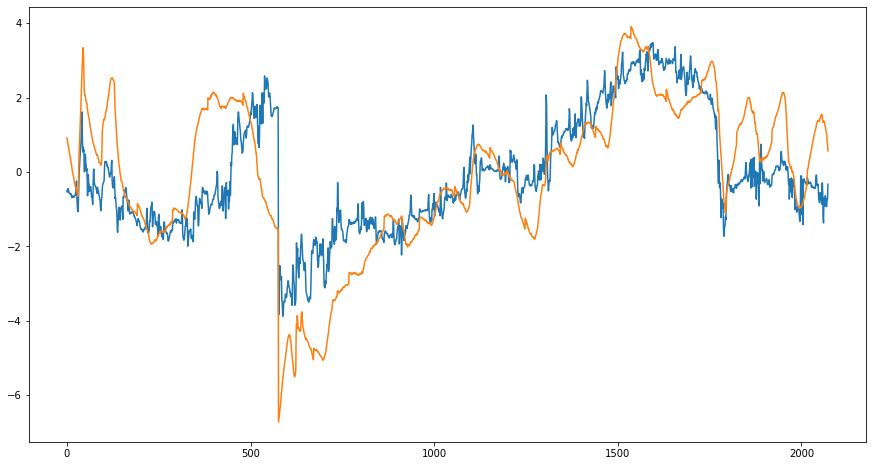

In [43]:
fig,ax=plt.subplots(figsize=(15,8))
ax.plot(some)
ax.plot(y_train)
plt.show()

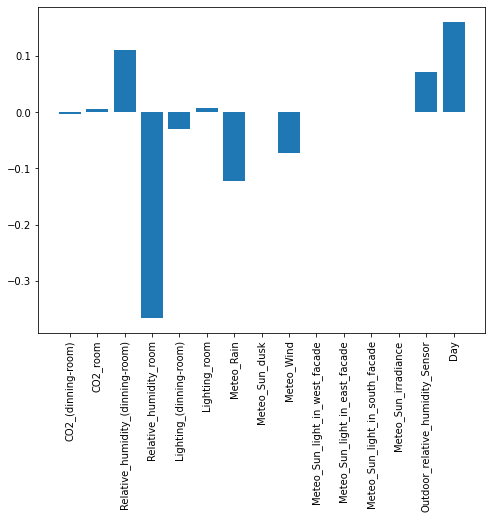

In [44]:
coeff=lnr.coef_
fig,ax=plt.subplots(figsize=(8,6))
ax.bar(x=X.columns,height=coeff)
plt.xticks(rotation=90)
plt.show()

# XGBRegressor

In [45]:
X=X_1.drop(['Indoor_temperature_room','Id'],axis=1)
y=X_1['Indoor_temperature_room']
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=40)

In [46]:
test_data=pd.merge(final_data2,test['Id'],on='Id')
ad2=pd.merge(test_data['Id'],ad,on='Id')

In [47]:
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [48]:
#define model evaluation method
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#evaluate model
#scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [49]:
params={
    "n_estimators":[i for i in range(100,400,50)],
    "max_depth":[i for i in range(4,10,1)]
}

In [50]:
#grid=XGBRegressor(learning_rate=0.05,n_estimators=2500)
#grid=GridSearchCV(xgr,param_grid=params,cv=8,verbose=1,n_jobs=-1,scoring='neg_mean_squared_error')
#grid_search=grid.fit(x_train,y_train)
#print(grid_search.best_score_ )
#grid.fit(x_train_y_train)

In [51]:
#best_params=grid_search.best_params_

In [52]:
model1=XGBRegressor(learning_rate=0.05,n_estimators=150)
model1.fit(x_train,y_train)
pred=model1.predict(x_val)
print(mean_squared_error(pred,y_val))
predicted_val=model1.predict(test_data.drop(['Id'],axis=1))

0.035296642073295456


In [53]:
model1.feature_names_in_

array(['CO2_(dinning-room)', 'CO2_room',
       'Relative_humidity_(dinning-room)', 'Relative_humidity_room',
       'Lighting_(dinning-room)', 'Lighting_room', 'Meteo_Rain',
       'Meteo_Sun_dusk', 'Meteo_Wind', 'Meteo_Sun_light_in_west_facade',
       'Meteo_Sun_light_in_east_facade',
       'Meteo_Sun_light_in_south_facade', 'Meteo_Sun_irradiance',
       'Outdoor_relative_humidity_Sensor', 'Day'], dtype='<U32')

In [54]:
model1.feature_importances_ *1000

array([ 20.75583  ,  49.51071  ,  30.458536 , 344.2943   ,   9.885059 ,
        10.75814  ,  71.71787  ,   8.150093 ,  15.273537 ,   7.5149517,
        15.200276 ,   6.815261 ,  19.913755 ,  41.469738 , 348.28198  ],
      dtype=float32)

In [55]:
pred=model1.predict(X_1.drop(['Id','Indoor_temperature_room'],axis=1))

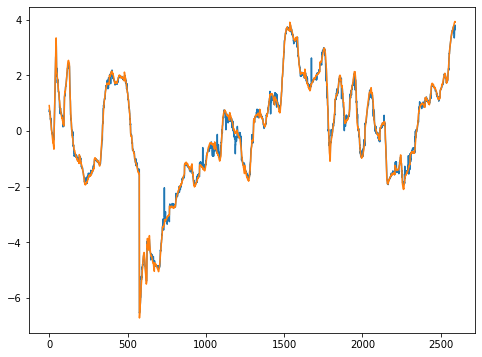

In [56]:
fig,ax=plt.subplots(figsize=(8,6))
#ax.plot(test_data['Id'],predicted_val)
ax.plot(pred)
ax.plot(X_1['Indoor_temperature_room'])
plt.show()

# LinearBoostRegressor

In [57]:
!pip install -q --upgrade linear-tree

from lineartree import LinearBoostRegressor
regressor = LinearBoostRegressor(base_estimator=LinearRegression(),
                                 n_estimators = 400,
                                 random_state = 42)


In [58]:
#grid=GridSearchCV(regressor,param_grid=params,cv=8,verbose=1,n_jobs=-1,scoring='neg_mean_absolute_error')
#grid_search=grid.fit(x_train,y_train)
#print(grid_search.best_score_)
#best_params=grid_search.best_params_

In [59]:
#model2=LinearBoostRegressor(base_estimator=LinearRegression(),random_state=42,**best_params)
model2=regressor
model2.fit(x_train,y_train)
predicted_val2=model2.predict(test_data.drop(['Id'],axis=1))
pred=model2.predict(x_train)
print(mean_squared_error(y_train,pred))

0.10129943744388216


# LSTM

In [60]:
my_submission=pd.DataFrame({'Id':test_data['Id'],'Indoor_temperature_room':predicted_val2})
my_submission['Indoor_temperature_room']=my_submission['Indoor_temperature_room']+ad2['Out_avg']

In [61]:
test_data.columns

Index(['Id', 'CO2_(dinning-room)', 'CO2_room',
       'Relative_humidity_(dinning-room)', 'Relative_humidity_room',
       'Lighting_(dinning-room)', 'Lighting_room', 'Meteo_Rain',
       'Meteo_Sun_dusk', 'Meteo_Wind', 'Meteo_Sun_light_in_west_facade',
       'Meteo_Sun_light_in_east_facade', 'Meteo_Sun_light_in_south_facade',
       'Meteo_Sun_irradiance', 'Outdoor_relative_humidity_Sensor', 'Day'],
      dtype='object')

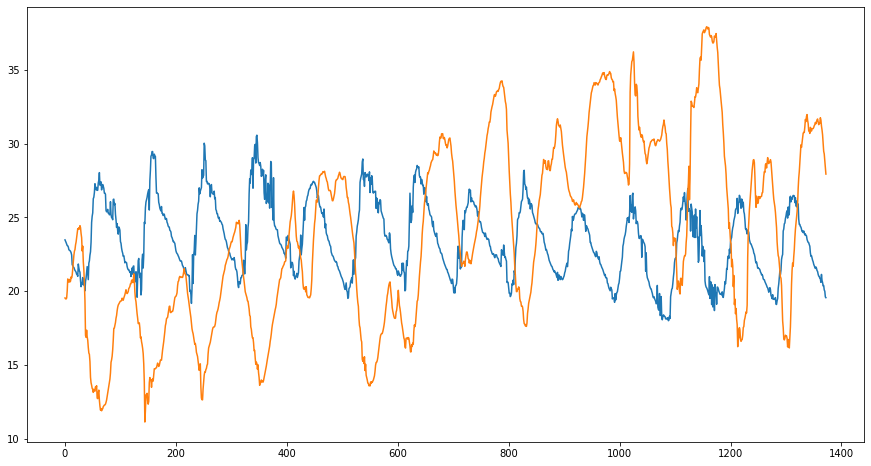

In [62]:
fig,ax=plt.subplots(figsize=(15,8))
ax.plot((my_submission['Indoor_temperature_room']))
ax.plot(test_data['Outdoor_relative_humidity_Sensor']/2)
plt.show()

In [63]:
my_submission.to_csv('submission.csv', index=False)

> Thanks for reading the notebook
If you like please upvote:)